# **Práctica 3: Análisis exploratorio de datos**

Nombre: Pieter Alexander van der Werff Vargas

No. Cuenta: 316246435

Email: piet.pizza@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un análisis exploratorio de datos con base en información obtenida de Yahoo Finanzas. Por ejemplo, datos de Spotify, Facebook, Amazon y Aeromexico.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
%pip install yfinance
%pip install googlefinance

Note: you may need to restart the kernel to use updated packages.
  Created wheel for googlefinance: filename=googlefinance-0.7-py3-none-any.whl size=2583 sha256=7a26e944e552cddd99c0d031dfd18a85a7b57254e70ae8c29aa0eeb820a1a295
  Stored in directory: c:\users\piete\appdata\local\pip\cache\wheels\33\b2\0c\4100366b1e7062ae96d384d16f4a4b324069b121991237f623
Successfully built googlefinance
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Spotify
DataSpotify = yf.Ticker('SPOT')
DataSpotify

yfinance.Ticker object <SPOT>

In [4]:
SpotifyHist = DataSpotify.history(start = '2019-1-1', end = '2022-9-6', interval = '1d')
SpotifyHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,111.660004,115.629997,110.360001,113.739998,861100,0,0
2019-01-03,112.080002,113.345001,108.589996,109.019997,1082300,0,0
2019-01-04,112.059998,121.470001,111.500000,118.510002,2484800,0,0
2019-01-07,115.040001,123.865997,113.279999,119.360001,2516200,0,0
2019-01-08,121.440002,122.769997,114.699997,117.480003,1257100,0,0
...,...,...,...,...,...,...,...
2022-08-29,107.449997,110.699997,106.870003,108.559998,966000,0,0
2022-08-30,110.320000,111.510002,105.769997,107.230003,951600,0,0
2022-08-31,109.500000,110.080002,107.349998,108.150002,1050400,0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

In [5]:
SpotifyHist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,111.660004,115.629997,110.360001,113.739998,861100,0,0
2019-01-03,112.080002,113.345001,108.589996,109.019997,1082300,0,0
2019-01-04,112.059998,121.470001,111.500000,118.510002,2484800,0,0
2019-01-07,115.040001,123.865997,113.279999,119.360001,2516200,0,0
2019-01-08,121.440002,122.769997,114.699997,117.480003,1257100,0,0
2019-01-09,118.599998,124.379997,118.161003,122.690002,1276700,0,0
2019-01-10,122.349998,124.970001,119.589996,123.930000,1347100,0,0
2019-01-11,123.000000,124.360001,118.290001,120.519997,1414400,0,0
2019-01-14,120.199997,128.000000,118.570000,126.709999,2474200,0,0


### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [6]:
SpotifyHist.shape

(926, 7)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [7]:
SpotifyHist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

Se observa que los datos son numéricos (flotante y entero).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [8]:
SpotifyHist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [9]:
SpotifyHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 926 entries, 2019-01-02 to 2022-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          926 non-null    float64
 1   High          926 non-null    float64
 2   Low           926 non-null    float64
 3   Close         926 non-null    float64
 4   Volume        926 non-null    int64  
 5   Dividends     926 non-null    int64  
 6   Stock Splits  926 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 57.9 KB


### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

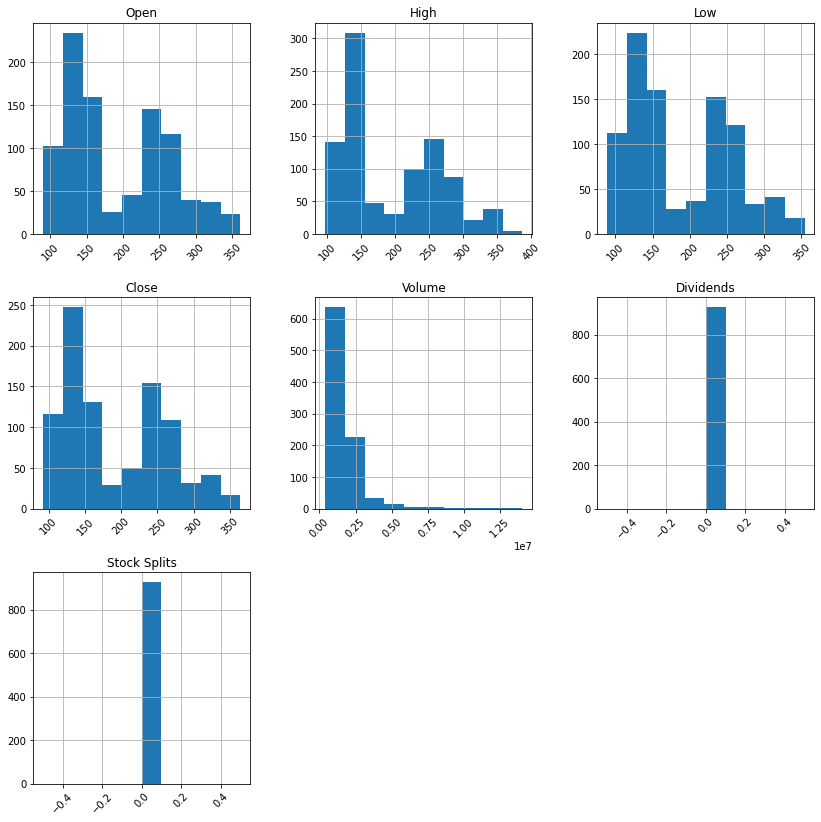

In [10]:
SpotifyHist.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma se observa que **Volume** tiene valores sesgados a la izquierda. Las variables **Dividens** y **Stock Splits** presentan valores en 'cero'.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [11]:
SpotifyHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,926.000000,926.000000,926.000000,926.000000,9.260000e+02,926.0,926.0
mean,191.837408,195.800918,187.823677,191.856620,1.740227e+06,0.0,0.0
std,68.522499,69.960136,66.931007,68.428768,1.318591e+06,0.0,0.0
min,90.440002,97.070000,89.029999,91.940002,3.945000e+05,0.0,0.0
25%,136.582497,139.794994,134.344997,137.260006,1.051575e+06,0.0,0.0
50%,153.875000,156.955002,151.032501,154.459999,1.385450e+06,0.0,0.0
75%,249.799995,254.610001,245.392498,249.770000,1.989300e+06,0.0,0.0
max,360.910004,387.440002,354.178009,364.589996,1.404930e+07,0.0,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


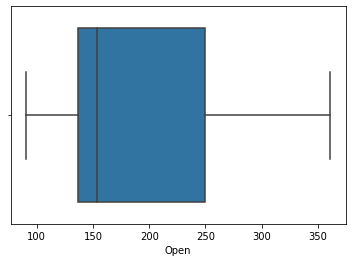

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


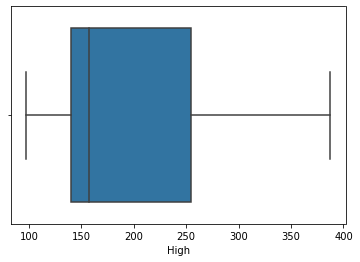

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


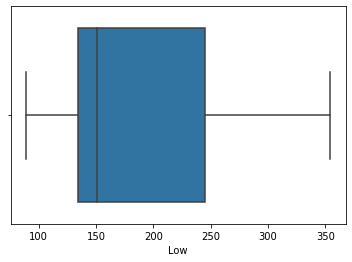

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


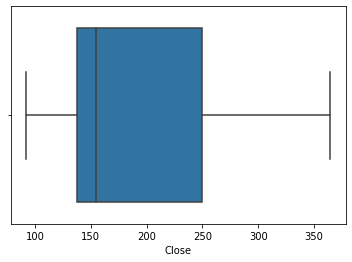

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


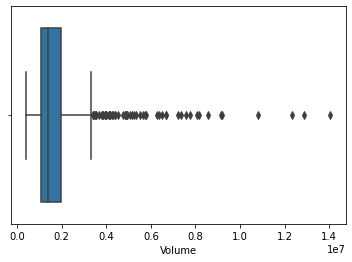

In [12]:
VariablesValoresAtipicos = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=SpotifyHist)
  plt.show()

Se observa que en Volume se tienen valores atípicos que están lejos de los otros valores.

**3. Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


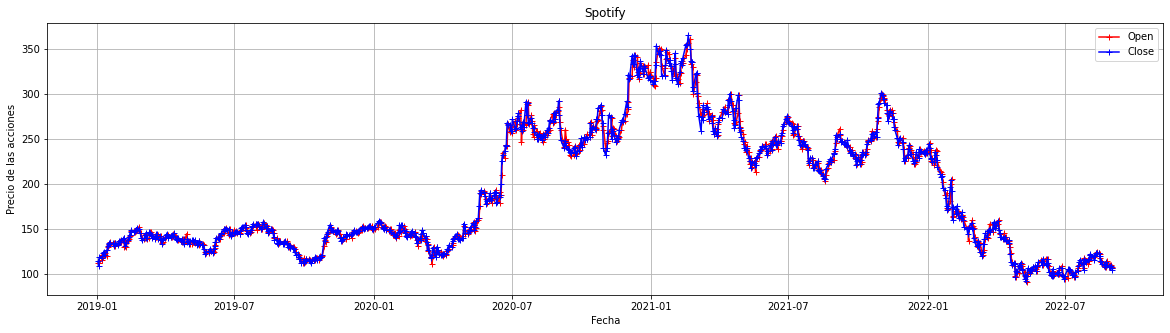

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(SpotifyHist['Open'], color='red', marker='+', label='Open')
plt.plot(SpotifyHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Spotify')
plt.grid(True)
plt.legend()
plt.show()

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [14]:
SpotifyHist.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998366,0.998509,0.996610,-0.028918,NaN,NaN
High,0.998366,1.000000,0.998179,0.998530,-0.006336,NaN,NaN
Low,0.998509,0.998179,1.000000,0.998472,-0.038474,NaN,NaN
Close,0.996610,0.998530,0.998472,1.000000,-0.019519,NaN,NaN
Volume,-0.028918,-0.006336,-0.038474,-0.019519,1.000000,NaN,NaN
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


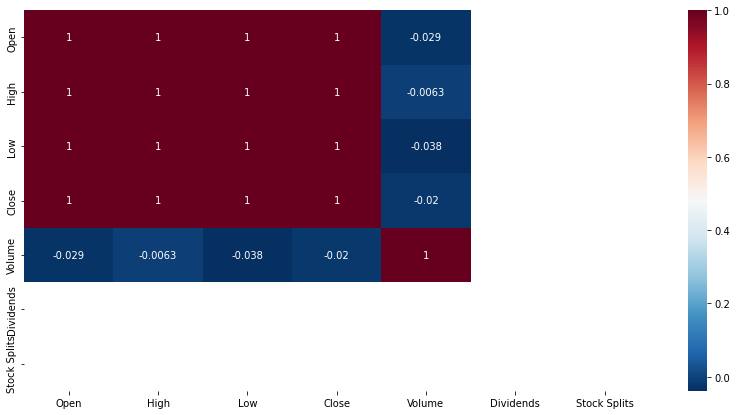

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(SpotifyHist.corr(), cmap='RdBu_r', annot=True)
plt.show()

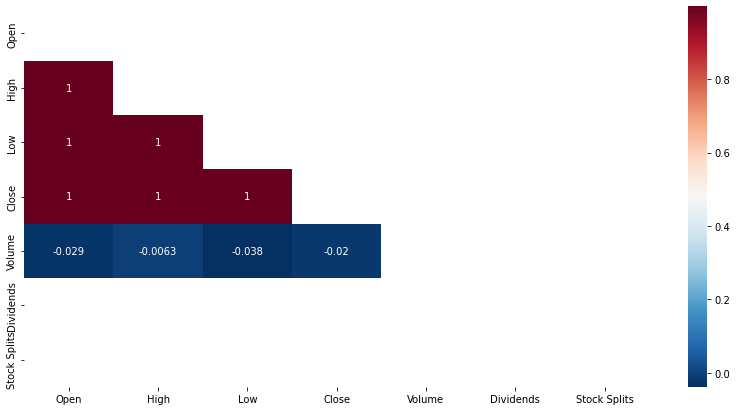

In [16]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(SpotifyHist.corr())
sns.heatmap(SpotifyHist.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


### Se incluyen otras fuentes de datos

In [17]:
# Para Facebook
DataFacebook = yf.Ticker('META')

In [18]:
FacebookHist = DataFacebook.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
FacebookHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200,0,0
2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900,0,0
2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100,0,0
2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300,0,0
2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800,0,0
...,...,...,...,...,...,...,...
2022-08-29,160.660004,163.050003,159.009995,159.169998,20052700,0,0
2022-08-30,160.350006,161.660004,155.910004,157.160004,19567900,0,0
2022-08-31,167.070007,167.839996,162.139999,162.929993,40953000,0,0


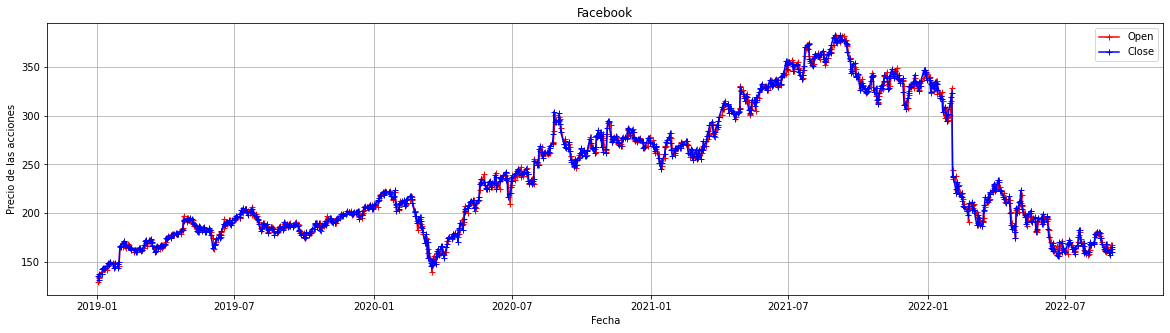

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(FacebookHist['Open'], color='red', marker='+', label='Open')
plt.plot(FacebookHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Facebook')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [21]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0
2019-01-03,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0
2019-01-04,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0
2019-01-07,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0
2019-01-08,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0
...,...,...,...,...,...,...,...
2022-08-29,129.899994,131.949997,128.770004,129.789993,48101600,0,0.0
2022-08-30,131.250000,132.070007,126.849998,128.729996,49203000,0,0.0
2022-08-31,129.449997,130.589996,126.739998,126.769997,53648700,0,0.0


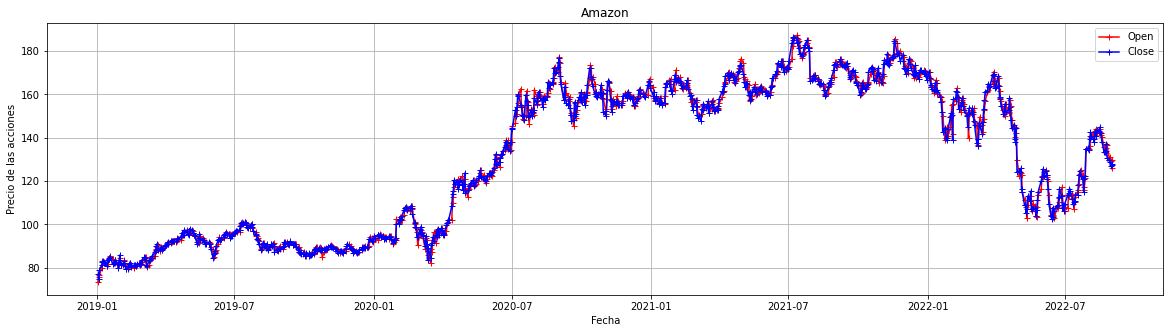

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='red', marker='+', label='Open')
plt.plot(AmazonHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
# Para Aeroméxico
DataAeromex = yf.Ticker('AEROMEX.MX')

In [24]:
AeromexHist = DataAeromex.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
AeromexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,22.000000,23.080000,22.000000,22.530001,54890,0,0
2019-01-03,22.500000,23.049999,22.500000,22.770000,88098,0,0
2019-01-04,23.430000,23.840000,22.780001,23.160000,69569,0,0
2019-01-07,23.180000,24.500000,23.100000,23.270000,160120,0,0
2019-01-08,23.219999,23.870001,22.820000,23.230000,190421,0,0
...,...,...,...,...,...,...,...
2022-08-30,194.809998,194.809998,194.809998,194.809998,0,0,0
2022-08-31,195.509995,199.990005,195.000000,198.979996,789,0,0
2022-09-01,198.979996,198.979996,198.979996,198.979996,0,0,0


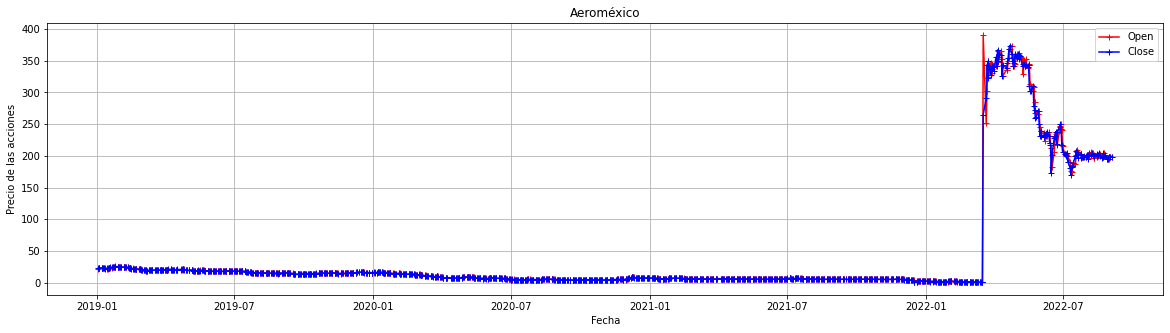

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(AeromexHist['Open'], color='red', marker='+', label='Open')
plt.plot(AeromexHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Aeroméxico')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
yf

<module 'yfinance' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\yfinance\\__init__.py'>

In [27]:
# América Móvil
DataAMXL = yf.Ticker('AMXL.MX')

In [28]:
AmeMovHist = DataAMXL.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
AmeMovHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,12.324619,12.895781,12.324619,12.851159,15584735,0.0,0
2019-01-03,12.815461,12.833310,12.503107,12.735142,32095100,0.0,0
2019-01-04,12.869009,13.029648,12.681596,12.779764,27543017,0.0,0
2019-01-07,12.806537,12.940403,12.645897,12.842235,51269698,0.0,0
2019-01-08,13.083193,13.511566,12.833310,13.431246,49018838,0.0,0
...,...,...,...,...,...,...,...
2022-08-30,17.830000,17.910000,17.660000,17.709999,41875540,0.0,0
2022-08-31,17.760000,17.780001,17.030001,17.170000,253598391,0.0,0
2022-09-01,17.110001,17.370001,17.010000,17.160000,55908597,0.0,0


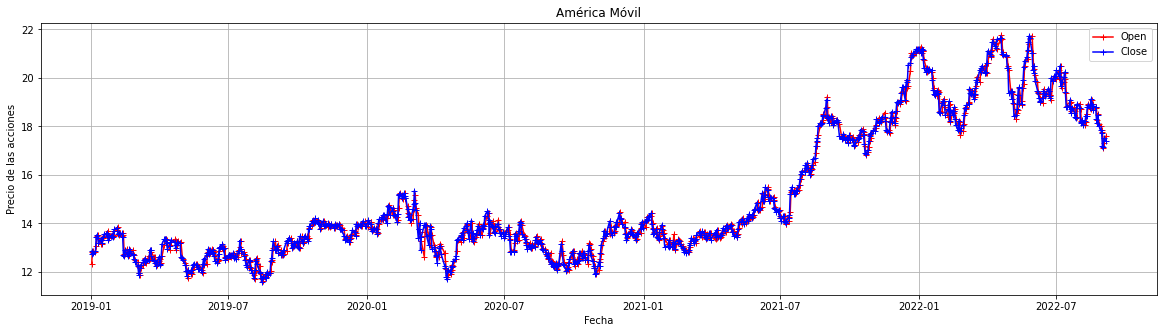

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(AmeMovHist['Open'], color='red', marker='+', label='Open')
plt.plot(AmeMovHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('América Móvil')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
# Walmart México
DataWalMX = yf.Ticker('WALMEX.MX')

In [31]:
WalmartHist = DataWalMX.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
WalmartHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,47.570590,47.665729,47.094884,47.304195,8464919,0.0,0
2019-01-03,47.190023,47.542048,45.743881,46.381325,11701824,0.0,0
2019-01-04,46.495496,47.351768,45.972220,47.247112,13447123,0.0,0
2019-01-07,47.361272,47.865522,46.999738,47.418358,10996330,0.0,0
2019-01-08,47.561076,48.236577,47.427875,48.065323,13410223,0.0,0
...,...,...,...,...,...,...,...
2022-08-30,68.669998,68.760002,66.680000,67.410004,11003092,0.0,0
2022-08-31,67.570000,67.849998,64.809998,65.839996,31046366,0.0,0
2022-09-01,65.970001,70.190002,65.870003,69.699997,20187437,0.0,0


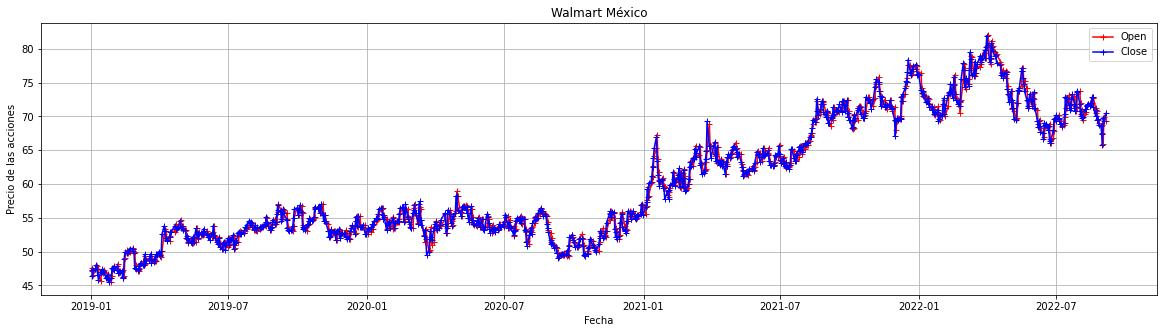

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(WalmartHist['Open'], color='red', marker='+', label='Open')
plt.plot(WalmartHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Walmart México')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
# FEMSA
DataFemsa = yf.Ticker('FEMSAUBD.MX')

In [34]:
FemsaHist = DataFemsa.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
FemsaHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,156.457351,158.708477,155.234529,158.013687,1242907,0.0,0
2019-01-03,158.615829,160.876214,158.078524,160.060989,2210217,0.0,0
2019-01-04,158.412023,162.117568,158.412023,160.783569,1949595,0.0,0
2019-01-07,158.449083,163.970351,158.449083,163.016174,2347243,0.0,0
2019-01-08,165.684183,165.684183,161.172673,164.340912,1797091,0.0,0
...,...,...,...,...,...,...,...
2022-08-30,129.130005,130.070007,128.210007,129.399994,2476470,0.0,0
2022-08-31,129.639999,130.029999,125.639999,126.269997,7532269,0.0,0
2022-09-01,125.889999,131.339996,125.510002,129.699997,2297516,0.0,0


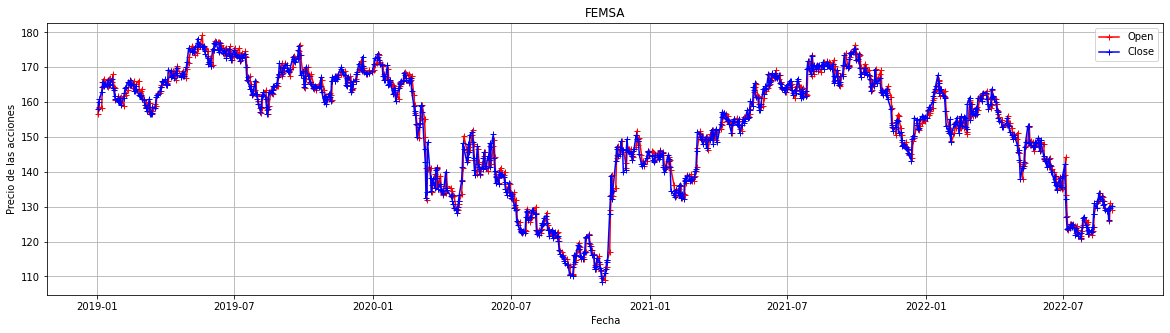

In [35]:
plt.figure(figsize=(20, 5))
plt.plot(FemsaHist['Open'], color='red', marker='+', label='Open')
plt.plot(FemsaHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('FEMSA')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
# ALFAA
DataAlfa = yf.Ticker('ALFAA.MX')

In [37]:
AlfaHist =  DataAlfa.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
AlfaHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,23.099010,23.505648,22.761798,23.118845,3015951,0.0,0
2019-01-03,23.079172,23.366793,22.722124,23.128761,5393913,0.0,0
2019-01-04,23.267618,23.783354,22.940324,23.555241,4849082,0.0,0
2019-01-07,23.783350,24.001547,23.525482,23.565155,6049177,0.0,0
2019-01-08,23.783354,24.289172,23.733764,24.041222,7112295,0.0,0
...,...,...,...,...,...,...,...
2022-08-30,13.430000,13.460000,13.100000,13.300000,4415591,0.0,0
2022-08-31,13.310000,13.420000,12.500000,12.820000,16320261,0.0,0
2022-09-01,12.850000,13.150000,12.600000,12.940000,4666130,0.0,0


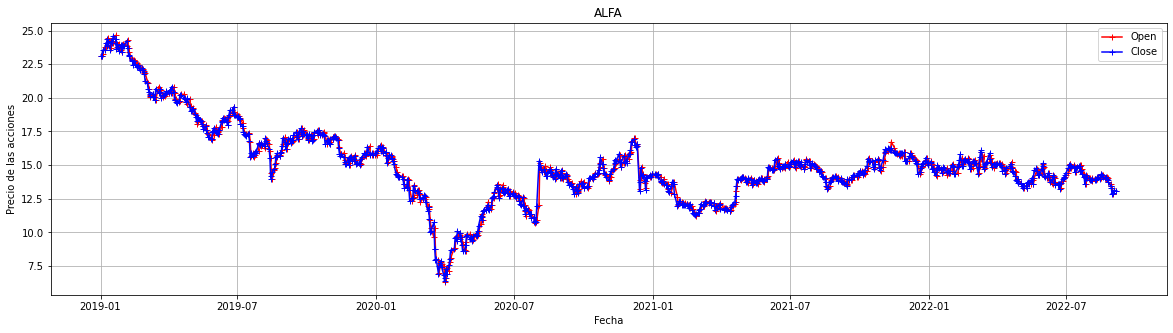

In [38]:
plt.figure(figsize=(20, 5))
plt.plot(AlfaHist['Open'], color='red', marker='+', label='Open')
plt.plot(AlfaHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('ALFA')
plt.grid(True)
plt.legend()
plt.show()

### Integración

In [39]:
SpotifyClose = SpotifyHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
SpotifyClose.rename(columns = {'Close': 'Spotify'}, inplace = True)
SpotifyClose

,Spotify
Date,
2019-01-02,113.739998
2019-01-03,109.019997
2019-01-04,118.510002
2019-01-07,119.360001
2019-01-08,117.480003
...,...
2022-08-29,108.559998
2022-08-30,107.230003
2022-08-31,108.150002


In [40]:
FacebookClose = FacebookHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
FacebookClose.rename(columns = {'Close': 'Facebook'}, inplace = True)
FacebookClose

,Facebook
Date,
2019-01-02,135.679993
2019-01-03,131.740005
2019-01-04,137.949997
2019-01-07,138.050003
2019-01-08,142.529999
...,...
2022-08-29,159.169998
2022-08-30,157.160004
2022-08-31,162.929993


In [41]:
AmazonClose = AmazonHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AmazonClose.rename(columns = {'Close': 'Amazon'}, inplace = True)
AmazonClose

,Amazon
Date,
2019-01-02,76.956497
2019-01-03,75.014000
2019-01-04,78.769501
2019-01-07,81.475502
2019-01-08,82.829002
...,...
2022-08-29,129.789993
2022-08-30,128.729996
2022-08-31,126.769997


In [42]:
AeromexClose = AeromexHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AeromexClose.rename(columns = {'Close': 'Aeromexico'}, inplace = True)
AeromexClose

,Aeromexico
Date,
2019-01-02,22.530001
2019-01-03,22.770000
2019-01-04,23.160000
2019-01-07,23.270000
2019-01-08,23.230000
...,...
2022-08-30,194.809998
2022-08-31,198.979996
2022-09-01,198.979996


In [43]:
# Se integran los cierres del precio de las acciones
Acciones = pd.concat([SpotifyClose, FacebookClose, AmazonClose, AeromexClose], 
                      axis = 'columns', join = 'inner')
Acciones

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-08-29,108.559998,159.169998,129.789993,194.809998
2022-08-30,107.230003,157.160004,128.729996,194.809998
2022-08-31,108.150002,162.929993,126.769997,198.979996


In [44]:
# En caso de tener valores nulos
AccionesNN = Acciones.dropna()
AccionesNN

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-08-29,108.559998,159.169998,129.789993,194.809998
2022-08-30,107.230003,157.160004,128.729996,194.809998
2022-08-31,108.150002,162.929993,126.769997,198.979996


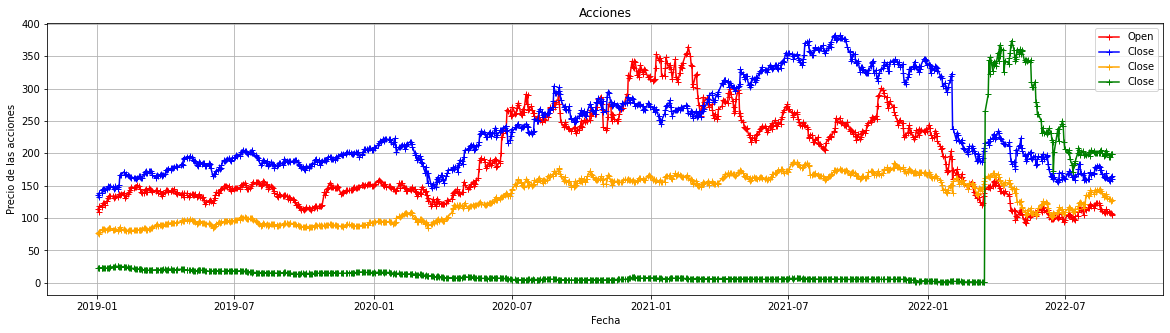

In [45]:
plt.figure(figsize=(20, 5))
plt.plot(Acciones['Spotify'], color='red', marker='+', label='Open')
plt.plot(Acciones['Facebook'], color='blue', marker='+', label='Close')
plt.plot(Acciones['Amazon'], color='orange', marker='+', label='Close')
plt.plot(Acciones['Aeromexico'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones')
plt.grid(True)
plt.legend()
plt.show()

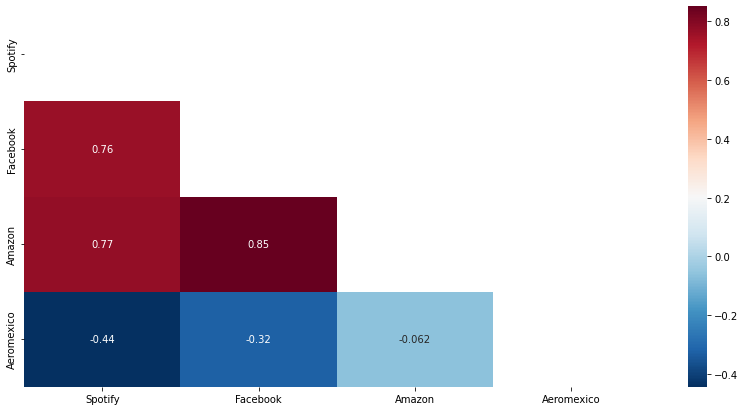

In [52]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Acciones.corr())
sns.heatmap(Acciones.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [53]:
Acciones.corr()

,Spotify,Facebook,Amazon,Aeromexico
Spotify,1.000000,0.763988,0.774803,-0.444118
Facebook,0.763988,1.000000,0.851634,-0.323497
Amazon,0.774803,0.851634,1.000000,-0.061689
Aeromexico,-0.444118,-0.323497,-0.061689,1.000000


In [56]:
DataAcciones = yf.download(['SPOT', 'META', 'AMZN', 'AEROMEX.MX'], start='2019-1-1', end='2022-9-6', 
                   interval='1d')
DataAcciones

[*********************100%***********************]  4 of 4 completed


Adj Close                                           Close  \
            AEROMEX.MX        AMZN        META        SPOT  AEROMEX.MX   
Date                                                                     
2019-01-02   22.530001   76.956497  135.679993  113.739998   22.530001   
2019-01-03   22.770000   75.014000  131.740005  109.019997   22.770000   
2019-01-04   23.160000   78.769501  137.949997  118.510002   23.160000   
2019-01-07   23.270000   81.475502  138.050003  119.360001   23.270000   
2019-01-08   23.230000   82.829002  142.529999  117.480003   23.230000   
...                ...         ...         ...         ...         ...   
2022-08-30  194.809998  128.729996  157.160004  107.230003  194.809998   
2022-08-31  198.979996  126.769997  162.929993  108.150002  198.979996   
2022-09-01  198.979996  127.820000  165.360001  106.519997  198.979996   
2022-09-02  198.979996  127.510002  160.320007  104.419998  198.979996   
2022-09-05  198.979996         NaN         NaN         NaN  198.979996   

                                                      High              ...  \
                  AMZN        META        SPOT  AEROMEX.MX        AMZN  ...   
Date                                                                    ...   
2019-01-02   76.956497  135.679993  113.739998   23.080000   77.667999  ...   
2019-01-03   75.014000  131.740005  109.019997   23.049999   76.900002  ...   
2019-01-04   78.769501  137.949997  118.510002   23.840000   79.699997  ...   
2019-01-07   81.475502  138.050003  119.360001   24.500000   81.727997  ...   
2019-01-08   82.829002  142.529999  117.480003   23.870001   83.830498  ...   
...                ...         ...         ...         ...         ...  ...   
2022-08-30  128.729996  157.160004  107.230003  194.809998  132.070007  ...   
2022-08-31  126.769997  162.929993  108.150002  199.990005  130.589996  ...   
2022-09-01  127.820000  165.360001  106.519997  198.979996  128.020004  ...   
2022-09-02  127.510002  160.320007  104.419998  198.979996  131.380005  ...   
2022-09-05         NaN         NaN         NaN  198.979996         NaN  ...   

                   Low                    Open                          \
                  META        SPOT  AEROMEX.MX        AMZN        META   
Date                                                                     
2019-01-02  128.559998  110.360001   22.000000   73.260002  128.990005   
2019-01-03  131.119995  108.589996   22.500000   76.000504  134.690002   
2019-01-04  133.750000  111.500000   23.430000   76.500000  134.009995   
2019-01-07  135.910004  113.279999   23.180000   80.115501  137.559998   
2019-01-08  139.539993  114.699997   23.219999   83.234497  139.889999   
...                ...         ...         ...         ...         ...   
2022-08-30  155.910004  105.769997  194.809998  131.250000  160.350006   
2022-08-31  162.139999  107.349998  195.509995  129.449997  167.070007   
2022-09-01  160.350006  102.180000  198.979996  126.000000  163.580002   
2022-09-02  159.220001  103.360001  198.979996  129.500000  167.449997   
2022-09-05         NaN         NaN  198.979996         NaN         NaN   

                           Volume                                      
                  SPOT AEROMEX.MX         AMZN        META       SPOT  
Date                                                                   
2019-01-02  111.660004    54890.0  159662000.0  28146200.0   861100.0  
2019-01-03  112.080002    88098.0  139512000.0  22717900.0  1082300.0  
2019-01-04  112.059998    69569.0  183652000.0  29002100.0  2484800.0  
2019-01-07  115.040001   160120.0  159864000.0  20089300.0  2516200.0  
2019-01-08  121.440002   190421.0  177628000.0  26263800.0  1257100.0  
...                ...        ...          ...         ...        ...  
2022-08-30  110.320000        0.0   49203000.0  19567900.0   951600.0  
2022-08-31  109.500000      789.0   53648700.0  40953000.0  1050400.0  
2022-09-01  106.059998        0.0   5663

In [46]:
AMXLClose = AmeMovHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AMXLClose.rename(columns = {'Close': 'AMXL'}, inplace = True)
AMXLClose

,AMXL
Date,
2019-01-02,12.851159
2019-01-03,12.735142
2019-01-04,12.779764
2019-01-07,12.842235
2019-01-08,13.431246
...,...
2022-08-30,17.709999
2022-08-31,17.170000
2022-09-01,17.160000


In [47]:
WalmartClose = WalmartHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
WalmartClose.rename(columns = {'Close': 'Walmart'}, inplace = True)
WalmartClose

,Walmart
Date,
2019-01-02,47.304195
2019-01-03,46.381325
2019-01-04,47.247112
2019-01-07,47.418358
2019-01-08,48.065323
...,...
2022-08-30,67.410004
2022-08-31,65.839996
2022-09-01,69.699997


In [48]:
FemsaClose = FemsaHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
FemsaClose.rename(columns = {'Close': 'Femsa'}, inplace = True)
FemsaClose

,Femsa
Date,
2019-01-02,158.013687
2019-01-03,160.060989
2019-01-04,160.783569
2019-01-07,163.016174
2019-01-08,164.340912
...,...
2022-08-30,129.399994
2022-08-31,126.269997
2022-09-01,129.699997


In [49]:
AlfaClose = AlfaHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AlfaClose.rename(columns = {'Close': 'Alfa'}, inplace = True)
AlfaClose

,Alfa
Date,
2019-01-02,23.118845
2019-01-03,23.128761
2019-01-04,23.555241
2019-01-07,23.565155
2019-01-08,24.041222
...,...
2022-08-30,13.300000
2022-08-31,12.820000
2022-09-01,12.940000


In [50]:
# Se integran los cierres del precio de las acciones
AccionesMx = pd.concat([AMXLClose, WalmartClose, FemsaClose, AlfaClose, AeromexClose], 
                      axis = 'columns', join = 'inner')
AccionesMx

,AMXL,Walmart,Femsa,Alfa,Aeromexico
Date,,,,,
2019-01-02,12.851159,47.304195,158.013687,23.118845,22.530001
2019-01-03,12.735142,46.381325,160.060989,23.128761,22.770000
2019-01-04,12.779764,47.247112,160.783569,23.555241,23.160000
2019-01-07,12.842235,47.418358,163.016174,23.565155,23.270000
2019-01-08,13.431246,48.065323,164.340912,24.041222,23.230000
...,...,...,...,...,...
2022-08-30,17.709999,67.410004,129.399994,13.300000,194.809998
2022-08-31,17.170000,65.839996,126.269997,12.820000,198.979996
2022-09-01,17.160000,69.699997,129.699997,12.940000,198.979996


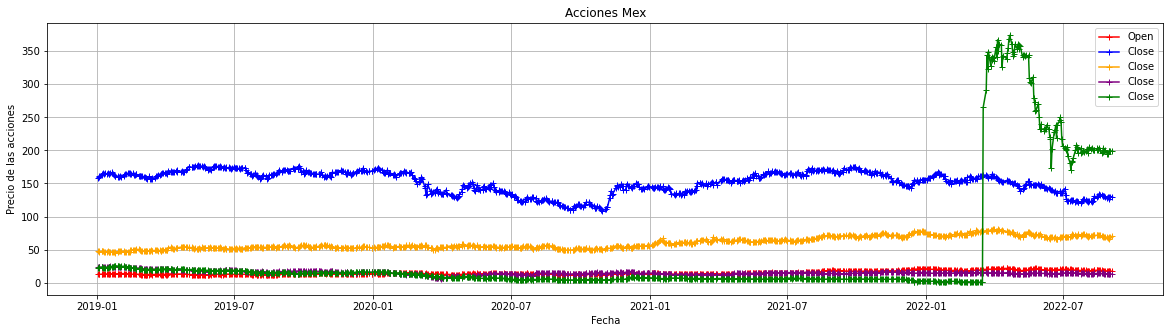

In [51]:
plt.figure(figsize=(20, 5))
plt.plot(AccionesMx['AMXL'], color='red', marker='+', label='Open')
plt.plot(AccionesMx['Femsa'], color='blue', marker='+', label='Close')
plt.plot(AccionesMx['Walmart'], color='orange', marker='+', label='Close')
plt.plot(AccionesMx['Alfa'], color='purple', marker='+', label='Close')
plt.plot(AccionesMx['Aeromexico'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones Mex')
plt.grid(True)
plt.legend()
plt.show()

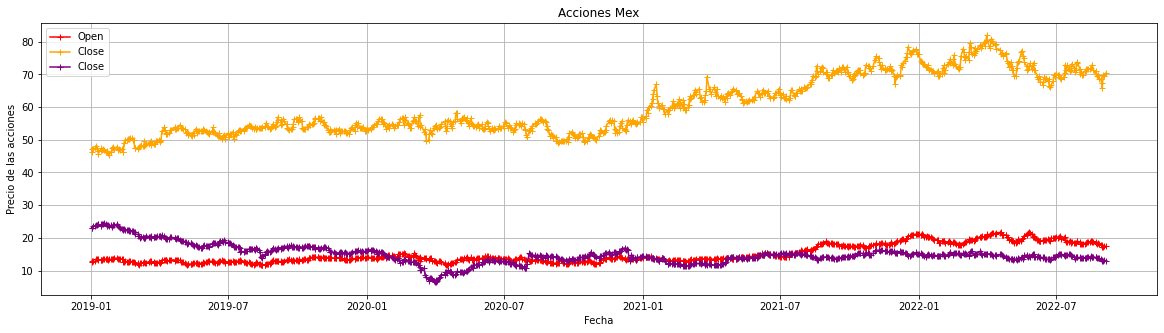

In [57]:
plt.figure(figsize=(20, 5))
plt.plot(AccionesMx['AMXL'], color='red', marker='+', label='Open')
#plt.plot(AccionesMx['Femsa'], color='blue', marker='+', label='Close')
plt.plot(AccionesMx['Walmart'], color='orange', marker='+', label='Close')
plt.plot(AccionesMx['Alfa'], color='purple', marker='+', label='Close')
#plt.plot(AccionesMx['Aeromexico'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones Mex')
plt.grid(True)
plt.legend()
plt.show()

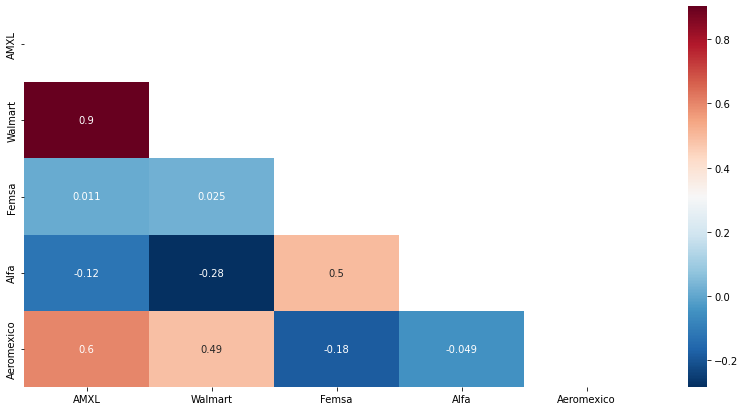

In [54]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(AccionesMx.corr())
sns.heatmap(AccionesMx.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [55]:
AccionesMx.corr()

,AMXL,Walmart,Femsa,Alfa,Aeromexico
AMXL,1.000000,0.902606,0.010904,-0.124761,0.601618
Walmart,0.902606,1.000000,0.025192,-0.282808,0.488581
Femsa,0.010904,0.025192,1.000000,0.495924,-0.180957
Alfa,-0.124761,-0.282808,0.495924,1.000000,-0.048611
Aeromexico,0.601618,0.488581,-0.180957,-0.048611,1.000000


In [58]:
DataAccionesMx = yf.download(['AMXL.MX', 'FEMSAUBD.MX', 'WALMEX.MX', 'ALFAA.MX', 'AEROMEX.MX'], start='2019-1-1', end='2022-9-6', 
                   interval='1d')
DataAccionesMx

[*********************100%***********************]  5 of 5 completed


Adj Close                                               \
            AEROMEX.MX   ALFAA.MX    AMXL.MX FEMSAUBD.MX  WALMEX.MX   
Date                                                                  
2019-01-02   22.530001  23.118845  12.851159  158.013702  47.304192   
2019-01-03   22.770000  23.128763  12.735142  160.061005  46.381321   
2019-01-04   23.160000  23.555241  12.779763  160.783569  47.247108   
2019-01-07   23.270000  23.565157  12.842235  163.016174  47.418358   
2019-01-08   23.230000  24.041222  13.431247  164.340912  48.065323   
...                ...        ...        ...         ...        ...   
2022-08-30  194.809998  13.300000  17.709999  129.399994  67.410004   
2022-08-31  198.979996  12.820000  17.170000  126.269997  65.839996   
2022-09-01  198.979996  12.940000  17.160000  129.699997  69.699997   
2022-09-02  198.979996  13.120000  17.520000  129.710007  69.360001   
2022-09-05  198.979996  13.060000  17.379999  130.250000  70.480003   

                 Close                                               ...  \
            AEROMEX.MX   ALFAA.MX    AMXL.MX FEMSAUBD.MX  WALMEX.MX  ...   
Date                                                                 ...   
2019-01-02   22.530001  23.309999  14.400000  170.570007  49.720001  ...   
2019-01-03   22.770000  23.320000  14.270000  172.779999  48.750000  ...   
2019-01-04   23.160000  23.750000  14.320000  173.559998  49.660000  ...   
2019-01-07   23.270000  23.760000  14.390000  175.970001  49.840000  ...   
2019-01-08   23.230000  24.240000  15.050000  177.399994  50.520000  ...   
...                ...        ...        ...         ...        ...  ...   
2022-08-30  194.809998  13.300000  17.709999  129.399994  67.410004  ...   
2022-08-31  198.979996  12.820000  17.170000  126.269997  65.839996  ...   
2022-09-01  198.979996  12.940000  17.160000  129.699997  69.699997  ...   
2022-09-02  198.979996  13.120000  17.520000  129.710007  69.360001  ...   
2022-09-05  198.979996  13.060000  17.379999  130.250000  70.480003  ...   

                  Open                                               \
            AEROMEX.MX   ALFAA.MX    AMXL.MX FEMSAUBD.MX  WALMEX.MX   
Date                                                                  
2019-01-02   22.000000  23.290001  13.810000  168.889999  50.000000   
2019-01-03   22.500000  23.270000  14.360000  171.220001  49.599998   
2019-01-04   23.430000  23.459999  14.420000  171.000000  48.869999   
2019-01-07   23.180000  23.980000  14.350000  171.039993  49.779999   
2019-01-08   23.219999  23.980000  14.660000  178.850006  49.990002   
...                ...        ...        ...         ...        ...   
2022-08-30  194.809998  13.430000  17.830000  129.130005  68.669998   
2022-08-31  195.509995  13.310000  17.760000  129.639999  67.570000   
2022-09-01  198.979996  12.850000  17.110001  125.889999  65.970001   
2022-09-02  198.979996  13.100000  17.330000  131.000000  69.989998   
2022-09-05  198.979996  13.100000  17.600000  128.990005  69.370003   

               Volume                                             
           AEROMEX.MX  ALFAA.MX    AMXL.MX FEMSAUBD.MX WALMEX.MX  
Date                                                              
2019-01-02      54890   3015951   15584735     1242907   8464919  
2019-01-03      88098   5393913   32095100     2210217  11701824  
2019-01-04      69569   4849082   27543017     1949595  13447123  
2019-01-07     160120   6049177   51269698     2347243  10996330  
2019-01-08     190421   7112295   49018838     1797091  13410223  
...               ...       ...        ...         ...       ...  
2022-08-30          0   4415591   41875540     2476470  11003092  
2022-08-31        789  16320261  253598391     7532269  31046366  
2022-09-01          0   4666130   55908597     2297516  20187437  
2022-09-02          0   5309494   51688058     2327007   9506506  
2022-09-05          0    152409    8077596      198916   1087843  

[928 rows x 30 colu